In [1]:
import pandas as pd #utilizada para importar os nossos dados
import matplotlib.pyplot as plt #utilizada para plotar os gráficos
import numpy as np  # utilizada para operações matemáticas

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
#importando os dados
df_petr4=pd.read_csv('PETR4.SA.csv')

In [9]:
#mostrando os dados
df_petr4.head()

Date       Open       High        Low      Close  Adj Close  \
0  2016-11-07  16.709999  17.209999  16.709999  17.209999  14.577669   
1  2016-11-08  17.100000  17.480000  16.730000  17.040001  14.433672   
2  2016-11-09  15.850000  17.100000  15.810000  16.650000  14.103323   
3  2016-11-10  17.100000  17.180000  15.500000  15.500000  13.129223   
4  2016-11-11  15.180000  15.460000  13.940000  14.010000  11.867121   

        Volume  
0   51625300.0  
1   56241000.0  
2  111417100.0  
3   94683900.0  
4  129811400.0

In [10]:
#mostrando os dados
df_petr4.tail()

Date       Open       High        Low      Close  Adj Close  \
1238  2021-10-28  28.530001  29.250000  28.250000  28.959999  28.959999   
1239  2021-10-29  29.129999  29.190001  26.969999  27.150000  27.150000   
1240  2021-11-01  27.709999  28.320000  27.370001  28.000000  28.000000   
1241  2021-11-03  27.709999  27.850000  26.799999  26.850000  26.850000   
1242  2021-11-04        NaN        NaN        NaN        NaN        NaN   

           Volume  
1238   89578000.0  
1239  157340000.0  
1240  102157200.0  
1241   83475800.0  
1242          NaN

In [11]:
#mostrando os tipos de dados encontrados
df_petr4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1243 non-null   object 
 1   Open       1238 non-null   float64
 2   High       1238 non-null   float64
 3   Low        1238 non-null   float64
 4   Close      1238 non-null   float64
 5   Adj Close  1238 non-null   float64
 6   Volume     1238 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.1+ KB


In [12]:
#retirando os valores nulos
df_petr4=df_petr4.dropna()
df_petr4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 1241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1238 non-null   object 
 1   Open       1238 non-null   float64
 2   High       1238 non-null   float64
 3   Low        1238 non-null   float64
 4   Close      1238 non-null   float64
 5   Adj Close  1238 non-null   float64
 6   Volume     1238 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.4+ KB


In [13]:
#transformando os dados
df_petr4['Date'] = pd.to_datetime(df_petr4.Date,format='%Y-%m-%d')
df_petr4.set_index('Date',inplace=True)

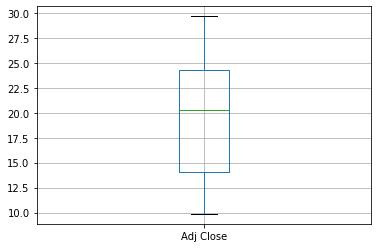

In [14]:
#verificando se existem outliers nos dados de fechamento
df_petr4.boxplot(column='Adj Close');

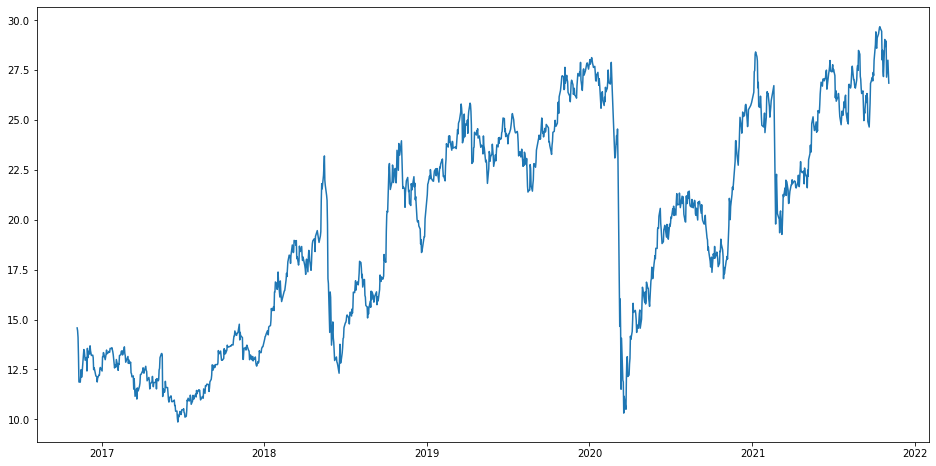

In [15]:
#plotando o gráfico
plt.figure(figsize=(16,8))
plt.plot(df_petr4['Adj Close'], label='Variação da PETR4');

In [16]:
#criando um novo dataset
novo_petr4 = pd.DataFrame(index=range(0,len(df_petr4)),columns=['Date', 'Adj Close'])

df_petr4_2=df_petr4.reset_index()


In [17]:
df_petr4_2.head()

Date       Open       High        Low      Close  Adj Close  \
0 2016-11-07  16.709999  17.209999  16.709999  17.209999  14.577669   
1 2016-11-08  17.100000  17.480000  16.730000  17.040001  14.433672   
2 2016-11-09  15.850000  17.100000  15.810000  16.650000  14.103323   
3 2016-11-10  17.100000  17.180000  15.500000  15.500000  13.129223   
4 2016-11-11  15.180000  15.460000  13.940000  14.010000  11.867121   

        Volume  
0   51625300.0  
1   56241000.0  
2  111417100.0  
3   94683900.0  
4  129811400.0

In [18]:
for i in range(0,len(df_petr4)):
    novo_petr4['Date'][i] = df_petr4_2['Date'][i]
    novo_petr4['Adj Close'][i] = df_petr4_2['Adj Close'][i]

In [19]:
novo_petr4.head()

Date  Adj Close
0  2016-11-07 00:00:00  14.577669
1  2016-11-08 00:00:00  14.433672
2  2016-11-09 00:00:00  14.103323
3  2016-11-10 00:00:00  13.129223
4  2016-11-11 00:00:00  11.867121

In [25]:
!pip install -U fastai

In [28]:
#!pip install fastai
from fastai.tabular.all import *
add_datepart(novo_petr4, 'Date')

Adj Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
0     14.577669  2016     11    45    7          0        312         False   
1     14.433672  2016     11    45    8          1        313         False   
2     14.103323  2016     11    45    9          2        314         False   
3     13.129223  2016     11    45   10          3        315         False   
4     11.867121  2016     11    45   11          4        316         False   
...         ...   ...    ...   ...  ...        ...        ...           ...   
1233  28.690001  2021     10    43   27          2        300         False   
1234  28.959999  2021     10    43   28          3        301         False   
1235      27.15  2021     10    43   29          4        302         False   
1236       28.0  2021     11    44    1          0        305         False   
1237      26.85  2021     11    44    3          2        307         False   

      Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
0              False           False             False        False   
1              False           False             False        False   
2              False           False             False        False   
3              False           False             False        False   
4              False           False             False        False   
...              ...             ...               ...          ...   
1233           False           False             False        False   
1234           False           False             False        False   
1235           False           False             False        False   
1236            True           False             False        False   
1237           False           False             False        False   

      Is_year_start       Elapsed  
0             False  1.478477e+09  
1             False  1.478563e+09  
2             False  1.478650e+09  
3             False  1.478736e+09  
4             False  1.478822e+09  
...             ...           ...  
1233          False  1.635293e+09  
1234          False  1.635379e+09  
1235          False  1.635466e+09  
1236          False  1.635725e+09  
1237          False  1.635898e+09  

[1238 rows x 14 columns]

In [29]:
#removendo a coluna de timestamp
novo_petr4.drop('Elapsed', axis=1, inplace=True)

In [35]:
novo_petr4.head()

Adj Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
0  14.577669  2016     11    45    7          0        312         False   
1  14.433672  2016     11    45    8          1        313         False   
2  14.103323  2016     11    45    9          2        314         False   
3  13.129223  2016     11    45   10          3        315         False   
4  11.867121  2016     11    45   11          4        316         False   

   Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
0           False           False             False        False   
1           False           False             False        False   
2           False           False             False        False   
3           False           False             False        False   
4           False           False             False        False   

   Is_year_start  seg_sext  
0          False         0  
1          False         0  
2          False         0  
3          False         0  
4          False         0

In [97]:
novo_petr4.drop(13,
  axis='columns', inplace=True)


In [93]:
for i in range(0, len(petr4)):
    if (novo_petr4['Dayofweek'][i] == 0 or novo_petr4['Dayofweek'][i] == 4):
        novo_petr4.loc[i, 'seg_sext'] = 1
    else:
        novo_petr4.loc[i, 'seg_sext'] = 0

In [98]:
novo_petr4.head()

Adj Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
0  14.577669  2016     11    45    7          0        312         False   
1  14.433672  2016     11    45    8          1        313         False   
2  14.103323  2016     11    45    9          2        314         False   
3  13.129223  2016     11    45   10          3        315         False   
4  11.867121  2016     11    45   11          4        316         False   

   Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
0           False           False             False        False   
1           False           False             False        False   
2           False           False             False        False   
3           False           False             False        False   
4           False           False             False        False   

   Is_year_start  seg_sext  
0          False         1  
1          False         0  
2          False         0  
3          False         0  
4          False         1

In [172]:
#dividindo entre treino e validação
train = novo_petr4[:int(novo_petr4.shape[0]*0.7)]
valid = novo_petr4[int(novo_petr4.shape[0]*0.7):]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

In [147]:
#aplicando o kNN
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [173]:
#definindo o modelo de normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))

In [174]:
#aplicando a normalização
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [175]:
#utilizando o gridSearch
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [176]:
#criando o modelo de previsão
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [182]:
valid.tail()

Adj Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
1233  28.690001  2021     10    43   27          2        300         False   
1234  28.959999  2021     10    43   28          3        301         False   
1235      27.15  2021     10    43   29          4        302         False   
1236       28.0  2021     11    44    1          0        305         False   
1237      26.85  2021     11    44    3          2        307         False   

      Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
1233           False           False             False        False   
1234           False           False             False        False   
1235           False           False             False        False   
1236            True           False             False        False   
1237           False           False             False        False   

      Is_year_start  seg_sext Predictions  
1233          False         0    25.91946  
1234          False         0   25.904101  
1235          False         1   26.039767  
1236          False         1   25.992877  
1237          False         0   25.228881

In [178]:
len(preds) == len(valid)

True

In [181]:
valid.loc[:]['Predictions'] = preds[:]

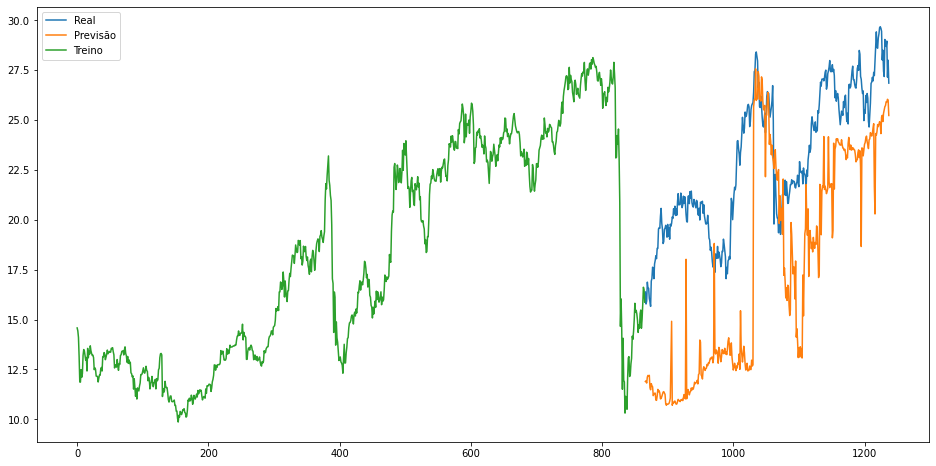

In [183]:
plt.figure(figsize=(16,8))
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close'])
plt.legend(['Real','Previsão','Treino']);